In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import os
pd.set_option('display.max_columns', 300)

In [2]:
#Grilled chickenを読み込むときdateのカラムは存在しない
origin_data = pd.read_csv("2017_katudon_takizawa.csv")
#origin_data = pd.read_csv("2017_nikomikatu.csv")
#origin_data = pd.read_csv("2017_Grilled chicken.csv")
#origin_data = pd.read_csv("Grilled chicken_3year.csv")

In [3]:
#origin_data.sort_values("")

In [4]:
origin_data=origin_data.fillna(0)

In [5]:
#売り切れで売れていないのをNAN商品があって売れてないのは0
for index,row in origin_data.iterrows():        
    if row.six_urisuu==0:
              if row.seven_urisuu==0 and row.eight_urisuu==0 and row.pm_nine_urisuu==0 and row.pm_ten_urisuu==0 and row.pm_eleve_urisuu==0:
                     origin_data.at[index,'six_urisuu'] =np.nan                             
    if row.seven_urisuu==0:  
              if  row.eight_urisuu==0 and row.pm_nine_urisuu==0 and row.pm_ten_urisuu==0 and row.pm_eleve_urisuu==0 :
                     origin_data.at[index,'seven_urisuu'] =np.nan                        
    if row.eight_urisuu==0:
              if  row.pm_nine_urisuu==0 and row.pm_ten_urisuu==0 and row.pm_eleve_urisuu==0 :
                     origin_data.at[index,'eight_urisuu'] =np.nan                     
    if row.pm_nine_urisuu==0:
              if row.pm_ten_urisuu==0 and row.pm_eleve_urisuu==0 :
                     origin_data.at[index,'pm_nine_urisuu'] =np.nan                     
    if row.pm_ten_urisuu==0:
              if row.pm_eleve_urisuu ==0:
                    origin_data.at[index,'pm_ten_urisuu'] =np.nan                    
    if row.pm_eleve_urisuu==0:     
         origin_data.at[index,'pm_eleve_urisuu']=np.nan                                  

In [6]:
#2017_Grilled chicken.csvを読み込む場合
#origin_data.drop(348,inplace=True)
#2017_katudon_takizawa.csv
origin_data.drop(348,inplace=True)

In [7]:
origin_data2=pd.DataFrame()

In [8]:
#時間別平均価格を作る
def avg_price(str1,str2,str3):
     origin_data2[str1]=origin_data[str2]/origin_data[str3]
        
avg_price('discount9','nine_urikin','nine_urisuu')
avg_price('discount10','ten_urikin','ten_urisuu')
avg_price('discount11','eleven_urikin','eleven_urisuu')
avg_price('discount0','noon_urikin','noon_urisuu')
avg_price('discount1','one_urikin','one_urisuu')
avg_price('discount2','two_urikin','two_urisuu')
avg_price('discount3','three_urikin','three_urisuu')
avg_price('discount4','four_urikin','four_urisuu')
avg_price('discount5','five_urikin','five_urisuu')
avg_price('discount6','six_urikin','six_urisuu')
avg_price('discount7','seven_urikin','seven_urisuu')
avg_price('discount8','eight_urikin','eight_urisuu')
avg_price('discount9_pm','pm_nine_urikin','pm_nine_urisuu')
avg_price('discount10_pm','pm_ten_urikin','pm_ten_urisuu')
avg_price('discount11_pm','pm_eleven_urikin','pm_eleve_urisuu')

In [9]:
origin_data2

,discount9,discount10,discount11,discount0,discount1,discount2,discount3,discount4,discount5,discount6,discount7,discount8,discount9_pm,discount10_pm,discount11_pm
0,NaN,498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,448.0,398.0,298.000000,298.0,398.0,NaN,249.0,199.000000,NaN
2,NaN,NaN,498.0,NaN,NaN,NaN,448.0,498.0,381.333333,448.0,NaN,NaN,249.0,199.000000,NaN
3,NaN,NaN,498.0,498.0,NaN,448.0,NaN,NaN,398.000000,NaN,NaN,NaN,249.0,249.000000,NaN
4,NaN,NaN,498.0,498.0,NaN,448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,498.0,NaN,NaN,NaN,NaN,298.0,NaN,NaN,NaN,NaN,NaN
6,NaN,498.0,498.0,498.0,448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,498.0,NaN,NaN,NaN,NaN,NaN,298.000000,498.0,NaN,398.0,249.0,249.000000,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,448.0,398.000000,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,498.0,NaN,448.0,NaN,398.0,431.333333,NaN,NaN,398.0,249.0,232.333333,NaN


In [10]:
def discount_graph(str):
    origin_data[str].value_counts().plot.bar(figsize=(15, 3), color='darkblue')
#discount_graph('discount9')
#discount_graph('discount8')

In [11]:
#時間別売り上げ個数以外は削除
origin_data=origin_data.drop(["SKUcode","item","nesage","urikin","nine_nesage","ten_nesage","eleven_nesage","noon_nesage",\
                              "one_nesage","two_nesage","three_nesage","four_nesage","five_nesage","six_nesage","seven_nesage",\
                              "eight_nesage","pm_nine_nesage","pm_ten_nesage","pm_eleven_nesage"],axis=1)

In [12]:
origin_data

,date,youbi,month,urisuu,nine_urisuu,nine_urikin,ten_urisuu,ten_urikin,eleven_urisuu,eleven_urikin,noon_urisuu,noon_urikin,one_urisuu,one_urikin,two_urisuu,two_urikin,three_urisuu,three_urikin,four_urisuu,four_urikin,five_urisuu,five_urikin,six_urisuu,six_urikin,seven_urisuu,seven_urikin,eight_urisuu,eight_urikin,pm_nine_urisuu,pm_nine_urikin,pm_ten_urisuu,pm_ten_urikin,pm_eleve_urisuu,pm_eleven_urikin
0,2017年01月01日(日),日,1月,4,0.0,0.0,3.0,1494.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,298.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2017年01月02日(月),月,1月,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,448.0,1.0,398.0,1.0,298.0,1.0,298.0,2.0,796.0,0.0,0.0,2.0,498.0,4.0,796.0,NaN,0.0
2,2017年01月03日(火),火,1月,12,0.0,0.0,0.0,0.0,1.0,498.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,448.0,1.0,498.0,3.0,1144.0,2.0,896.0,0.0,0.0,0.0,0.0,2.0,498.0,2.0,398.0,NaN,0.0
3,2017年01月04日(水),水,1月,12,0.0,0.0,0.0,0.0,1.0,498.0,1.0,498.0,0.0,0.0,1.0,448.0,0.0,0.0,0.0,0.0,2.0,796.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1494.0,1.0,249.0,NaN,0.0
4,2017年01月05日(木),木,1月,4,0.0,0.0,0.0,0.0,1.0,498.0,2.0,996.0,0.0,0.0,1.0,448.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
5,2017年01月06日(金),金,1月,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,498.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,894.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
6,2017年01月07日(土),土,1月,4,0.0,0.0,1.0,498.0,1.0,498.0,1.0,498.0,1.0,448.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
7,2017年01月08日(日),日,1月,12,0.0,0.0,0.0,0.0,3.0,1494.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,298.0,2.0,996.0,0.0,0.0,2.0,796.0,3.0,747.0,1.0,249.0,NaN,0.0
8,2017年01月09日(月),月,1月,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,448.0,2.0,796.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
9,2017年01月10日(火),火,1月,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,498.0,0.0,0.0,1.0,448.0,0.0,0.0,1.0,398.0,3.0,1294.0,0.0,0.0,0.0,0.0,1.0,398.0,2.0,498.0,3.0,697.0,NaN,0.0


In [13]:
#平均価格のデータがない場合は0を代入
origin_data2['discount0'].fillna(498,inplace=True)
origin_data2['discount1'].fillna(0,inplace=True)
origin_data2['discount2'].fillna(0,inplace=True)
origin_data2['discount3'].fillna(0,inplace=True)
origin_data2['discount4'].fillna(0,inplace=True)
origin_data2['discount5'].fillna(0,inplace=True)
origin_data2['discount6'].fillna(0,inplace=True)
origin_data2['discount7'].fillna(0,inplace=True)
origin_data2['discount8'].fillna(0,inplace=True)
origin_data2['discount9'].fillna(498,inplace=True)
origin_data2['discount10'].fillna(498,inplace=True)
origin_data2['discount11'].fillna(498,inplace=True)
origin_data2['discount9_pm'].fillna(0,inplace=True)
origin_data2['discount10_pm'].fillna(0,inplace=True)
origin_data2['discount11_pm'].fillna(0,inplace=True)
#print(origin_data['discount0'])

In [14]:
### 要相談
#平均価格のデータがないセルの埋め方
#発生する原因　売れた個数と金額から平均価格を算出しているから１つも売れない(またはそもそも売っていないと)とどちらも0になるから平均価格もわかない

ave9=(origin_data2['discount9']+origin_data2['discount9'])/2
ave10=(origin_data2['discount9']+origin_data2['discount11'])/2
ave11=(origin_data2['discount10']+origin_data2['discount0'])/2
ave12=(origin_data2['discount11']+origin_data2['discount1'])/2
ave1=(origin_data2['discount0']+origin_data2['discount2'])/2
ave2=(origin_data2['discount1']+origin_data2['discount3'])/2
ave3=(origin_data2['discount2']+origin_data2['discount4'])/2
ave4=(origin_data2['discount3']+origin_data2['discount5'])/2
ave5=(origin_data2['discount4']+origin_data2['discount6'])/2
ave6=(origin_data2['discount5']+origin_data2['discount7'])/2
ave7=(origin_data2['discount6']+origin_data2['discount8'])/2
ave8=(origin_data2['discount7']+origin_data2['discount9_pm'])/2
ave9_pm=(origin_data2['discount8']+origin_data2['discount10_pm'])/2
ave10_pm=(origin_data2['discount9_pm']+origin_data2['discount11_pm'])/2
ave11_pm=(origin_data2['discount11_pm']+origin_data2['discount11_pm'])/2

In [15]:
aved = pd.DataFrame({ 
    'avg9':ave9,
    'avg10':ave10,
    'avg11':ave11,
    'avg12':ave12,
    'avg1':ave1,
    'avg2':ave2,
    'avg3':ave3,
    'avg4':ave4,
    'avg5':ave5, 
    'avg6':ave6,
    'avg7':ave7,
    'avg8':ave8,
    'avg9_pm':ave9_pm,
    'avg10_pm':ave10_pm,
    'avg11_pm':ave11_pm,
}) 

In [16]:
aved=aved.ix[:,['avg9','avg10','avg11','avg12','avg1','avg2','avg3','avg4','avg5','avg6','avg7','avg8','avg9_pm','avg10_pm','avg11_pm']]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [17]:
aved

,avg9,avg10,avg11,avg12,avg1,avg2,avg3,avg4,avg5,avg6,avg7,avg8,avg9_pm,avg10_pm,avg11_pm
0,498.0,498.0,498.0,249.0,249.0,0.0,0.0,0.000000,0.00,149.000000,0.00,149.00,0.000000,0.00,0.0
1,498.0,498.0,498.0,249.0,249.0,224.0,199.0,373.000000,348.00,348.000000,149.00,323.50,99.500000,124.50,0.0
2,498.0,498.0,498.0,249.0,249.0,224.0,249.0,414.666667,473.00,190.666667,224.00,124.50,99.500000,124.50,0.0
3,498.0,498.0,498.0,249.0,473.0,0.0,224.0,199.000000,0.00,199.000000,0.00,124.50,124.500000,124.50,0.0
4,498.0,498.0,498.0,249.0,473.0,0.0,224.0,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.0
5,498.0,498.0,498.0,498.0,249.0,249.0,0.0,0.000000,149.00,0.000000,149.00,0.00,0.000000,0.00,0.0
6,498.0,498.0,498.0,473.0,249.0,224.0,0.0,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.0
7,498.0,498.0,498.0,249.0,249.0,0.0,0.0,149.000000,249.00,149.000000,448.00,124.50,323.500000,124.50,0.0
8,498.0,498.0,498.0,249.0,249.0,0.0,224.0,199.000000,224.00,199.000000,0.00,0.00,0.000000,0.00,0.0
9,498.0,498.0,498.0,249.0,473.0,0.0,423.0,215.666667,199.00,215.666667,199.00,124.50,315.166667,124.50,0.0


In [18]:
for index,row in origin_data2.iterrows(): 
    if row.discount1==0:
                    origin_data2.at[index,'discount1']=aved.at[index,'avg1']
    if row.discount2==0:
                     origin_data2.at[index,'discount2'] =aved.at[index,'avg2']                          
    if row.discount3==0:  
                    origin_data2.at[index,'discount3'] =aved.at[index,'avg3']                    
    if row.discount4==0:
                   origin_data2.at[index,'discount4'] =aved.at[index,'avg4']
    if row.discount5==0:
                    origin_data2.at[index,'discount5']=aved.at[index,'avg5']
    if row.discount6==0:
                     origin_data2.at[index,'discount6'] =aved.at[index,'avg6']                          
    if row.discount7==0:  
                    origin_data2.at[index,'discount7'] =aved.at[index,'avg7']                    
    if row.discount8==0:
                   origin_data2.at[index,'discount8'] =aved.at[index,'avg8']
    if row.discount9_pm==0:
                    origin_data2.at[index,'discount9_pm']=aved.at[index,'avg9_pm']
    if row.discount10_pm==0:
                     origin_data2.at[index,'discount10_pm'] =aved.at[index,'avg10_pm']  

In [19]:
origin_data2=origin_data2.T

In [20]:
origin_data2=pd.melt(origin_data2)

In [21]:
origin_data2.drop("variable",inplace=True,axis=1)

In [22]:
origin_data2=origin_data2.rename(columns={"value":"price"})

In [23]:
#あぶり焼き
#origin_data["youbi"]=origin_data["youbi"].astype("str")
origin_data.rename(columns={"youbi":"week"},inplace=True)
origin_data.rename(columns={"date":"youbi"},inplace=True)
origin_data.drop(["month","week"],axis=1,inplace=True)

In [24]:
#日付をdatetimeにするために不要の部分を取り除く
origin_data["youbi"]=origin_data["youbi"].apply(lambda x: x.replace(')','').replace('(','').replace('日','').replace('月','').replace('年',''))
origin_data["youbi"]=origin_data["youbi"].apply(lambda x: x.replace('火','').replace('水','').replace('木','').replace('金','').replace('土',''))
#origin_data
#あぶり焼きチキン１年分の時
#origin_data["datetime"]=pd.to_datetime(origin_data["youbi"],format='%Y%m%d')
#カツ丼のとき
origin_data["datetime"]=pd.to_datetime(origin_data["youbi"],format='%Y%m%d')
origin_data.drop("youbi",axis=1,inplace=True)

In [25]:
origin_data.head()

,urisuu,nine_urisuu,nine_urikin,ten_urisuu,ten_urikin,eleven_urisuu,eleven_urikin,noon_urisuu,noon_urikin,one_urisuu,one_urikin,two_urisuu,two_urikin,three_urisuu,three_urikin,four_urisuu,four_urikin,five_urisuu,five_urikin,six_urisuu,six_urikin,seven_urisuu,seven_urikin,eight_urisuu,eight_urikin,pm_nine_urisuu,pm_nine_urikin,pm_ten_urisuu,pm_ten_urikin,pm_eleve_urisuu,pm_eleven_urikin,datetime
0,4,0.0,0.0,3.0,1494.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,298.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2017-01-01
1,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,448.0,1.0,398.0,1.0,298.0,1.0,298.0,2.0,796.0,0.0,0.0,2.0,498.0,4.0,796.0,NaN,0.0,2017-01-02
2,12,0.0,0.0,0.0,0.0,1.0,498.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,448.0,1.0,498.0,3.0,1144.0,2.0,896.0,0.0,0.0,0.0,0.0,2.0,498.0,2.0,398.0,NaN,0.0,2017-01-03
3,12,0.0,0.0,0.0,0.0,1.0,498.0,1.0,498.0,0.0,0.0,1.0,448.0,0.0,0.0,0.0,0.0,2.0,796.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1494.0,1.0,249.0,NaN,0.0,2017-01-04
4,4,0.0,0.0,0.0,0.0,1.0,498.0,2.0,996.0,0.0,0.0,1.0,448.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2017-01-05


In [26]:
urisuu_data2017=origin_data[["datetime","nine_urisuu","ten_urisuu","eleven_urisuu","noon_urisuu"\
                         ,"one_urisuu","two_urisuu","three_urisuu","four_urisuu"\
                         ,"five_urisuu","six_urisuu","seven_urisuu","eight_urisuu",\
                         "pm_nine_urisuu","pm_ten_urisuu","pm_eleve_urisuu"]]

In [27]:
urisuu_data2017.set_index("datetime",inplace=True,drop=True)

In [28]:
urisuu_data2017=urisuu_data2017.T

In [29]:
urisuu_data2017=pd.melt(urisuu_data2017)

In [30]:
urisuu_data2017

,datetime,value
0,2017-01-01,0.0
1,2017-01-01,3.0
2,2017-01-01,0.0
3,2017-01-01,0.0
4,2017-01-01,0.0
5,2017-01-01,0.0
6,2017-01-01,0.0
7,2017-01-01,0.0
8,2017-01-01,0.0
9,2017-01-01,0.0


In [31]:
#iの添え字を変更indexに
import datetime
#3年の場合
#for i in range(0,6195):
#1年の場合
for i in range(0,5220):
    k=i
    i=i%15+9
    urisuu_data2017.at[urisuu_data2017.index[k],"datetime"]=urisuu_data2017.at[urisuu_data2017.index[k],"datetime"]+datetime.timedelta(hours=i) 

In [32]:
#,時間月、曜日、第何週目かを新たにmonth,youbi,weekofyearとして作る
urisuu_data2017["hour"]=urisuu_data2017["datetime"].dt.hour
urisuu_data2017["month"]=urisuu_data2017["datetime"].dt.month
urisuu_data2017["youbi"]=urisuu_data2017["datetime"].dt.dayofweek
urisuu_data2017["youbi"]=urisuu_data2017["youbi"].astype("str")
urisuu_data2017["month"]=urisuu_data2017["month"].astype("str")
urisuu_data2017["hour"]=urisuu_data2017["hour"].astype("str")
urisuu_data2017["weekofyear"]=urisuu_data2017["datetime"].dt.weekofyear
urisuu_data2017.loc[urisuu_data2017.index <= 14, 'weekofyear'] = 1

In [33]:
urisuu_data2017.rename(columns={"value":"uri_su"},inplace=True)

In [34]:
#origin_data2は１時間毎の平均価格が格納
urisuu_data2017=pd.concat([urisuu_data2017,origin_data2],axis=1)

In [35]:
#曜日変数と月変数,時間をダミー変数で置き換える
weekday_dummy = pd.get_dummies(urisuu_data2017[['youbi','month',"hour"]], drop_first = False)
#print(weekday_dummy)
urisuu_data2017 = pd.concat([urisuu_data2017, weekday_dummy],axis=1)
#origin_data.head()

In [36]:
#日付順に並び替え
urisuu_data2017.sort_values("datetime",inplace=True)

In [37]:
os.chdir('/Users/watanabeyui/aoi_analytics/Past_weather_data_hourly_snow')
os.getcwd()

'/Users/watanabeyui/aoi_analytics/Past_weather_data_hourly_snow'

In [38]:
import glob
files = glob.glob("*.csv")#フォルダ内の全てのCSVファイルを取得
print(files)

['2017_3_22.csv', '2017_12_14.csv', '2016_3_22.csv', '2017_4_17.csv', '2017_5_2.csv', '2016_4_17.csv', '2016_7_5.csv', '2017_12_28.csv', '2016_5_7.csv', '2016_3_1.csv', '2017_1_6.csv', '2016_8_17.csv', '2017_1_27.csv', '2017_10_11.csv', '2016_1_27.csv', '2016_11_26.csv', '2017_8_17.csv', '2016_1_3.csv', '2017_6_12.csv', '2017_3_4.csv', '2016_6_12.csv', '2017_3_5.csv', '2016_6_13.csv', '2017_6_13.csv', '2016_1_2.csv', '2017_8_16.csv', '2016_11_27.csv', '2016_1_26.csv', '2017_10_10.csv', '2017_1_26.csv', '2016_8_16.csv', '2017_1_7.csv', '2016_5_6.csv', '2017_7_1.csv', '2016_4_16.csv', '2017_12_29.csv', '2016_7_4.csv', '2017_5_3.csv', '2017_4_16.csv', '2016_3_23.csv', '2017_12_15.csv', '2017_3_23.csv', '2016_9_9.csv', '2017_12_17.csv', '2016_3_21.csv', '2016_4_28.csv', '2017_3_21.csv', '2017_4_28.csv', '2016_7_6.csv', '2016_4_14.csv', '2017_4_14.csv', '2017_5_1.csv', '2016_5_4.csv', '2017_7_3.csv', '2017_1_5.csv', '2016_3_2.csv', '2017_1_30.csv', '2017_10_12.csv', '2016_1_24.csv', '2016_1

In [39]:
weather_tb = pd.DataFrame()
for file in files:
    t = pd.read_csv(file)
    weather_tb = pd.concat([weather_tb, t])#横方向への結合なのでaxis=1を指定

In [40]:
weather_tb["date"]=pd.to_datetime(weather_tb["date"],format="%Y年%m月%d日%H時")
weather_tb.reset_index(inplace=True,drop=True)

In [41]:
weather_tb.sort_values('date',inplace=True)

In [42]:
weather_tb.columns=["date","weather","avg_temp","snow","sekisetu"]

In [43]:
weather_tb=weather_tb.replace("--",0)
weather_tb["weather"]=weather_tb["weather"].replace("\)","")
weather_tb["snow"]=weather_tb["snow"].replace("×","0")
weather_tb["sekisetu"]=weather_tb["sekisetu"].replace("×","0")

In [44]:
print(weather_tb.dtypes)

date        datetime64[ns]
weather             object
avg_temp            object
snow                object
sekisetu            object
dtype: object


In [45]:
pd.set_option('display.max_rows', 5000)
weather_tb["snow"]=weather_tb["snow"].astype(float)
weather_tb["sekisetu"]=weather_tb["sekisetu"].astype(float)
weather_tb["weather"]=weather_tb["weather"].astype(str)

In [46]:
print(weather_tb.dtypes)

date        datetime64[ns]
weather             object
avg_temp            object
snow               float64
sekisetu           float64
dtype: object


In [47]:
weather_tb["weather"]=weather_tb['weather'].apply(lambda x: x.replace('.',''))

In [48]:
weather_tb["weather"]=weather_tb['weather'].apply(lambda x: x.replace(')',''))

In [49]:
weather_tb["weather"]=weather_tb["weather"].astype(float)

In [50]:
weather_tb["weather"]=weather_tb["weather"].astype(float)

In [51]:
import seaborn as sns
sns.set()
#sns.jointplot(x=weather_tb["weather"],y=origin_data["six_urisuu"],data=origin_data,color="green")

In [52]:
#sns.jointplot(x=origin_data["avg_temp"],y=origin_data["six_urisuu"],data=origin_data,color="green")

In [53]:
print(weather_tb.dtypes)

date        datetime64[ns]
weather            float64
avg_temp            object
snow               float64
sekisetu           float64
dtype: object


In [54]:
weather_tb.reset_index(inplace=True,drop=True)

In [55]:
weather_tb=weather_tb.rename(columns={"date":"datetime"})

In [56]:
#weather_tb

In [57]:
#天気データのdirに移動して、加工データとマージする
origin_data=pd.merge(urisuu_data2017,weather_tb,on="datetime")

In [58]:
origin_data.head()

,datetime,uri_su,hour,month,youbi,weekofyear,price,youbi_0,youbi_1,youbi_2,youbi_3,youbi_4,youbi_5,youbi_6,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,hour_0,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_9,weather,avg_temp,snow,sekisetu
0,2017-01-01 09:00:00,0.0,9,1,6,1,498.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,2.7,0.0,0.0
1,2017-01-01 10:00:00,3.0,10,1,6,1,498.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3.4,0.0,0.0
2,2017-01-01 11:00:00,0.0,11,1,6,1,498.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5,0.0,0.0
3,2017-01-01 12:00:00,0.0,12,1,6,1,498.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5,0.0,0.0
4,2017-01-01 13:00:00,0.0,13,1,6,1,249.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,6.4,0.0,0.0


In [59]:
os.chdir('/Users/watanabeyui/aoi_analytics/')
origin_data.columns

Index(['datetime', 'uri_su', 'hour', 'month', 'youbi', 'weekofyear', 'price',
       'youbi_0', 'youbi_1', 'youbi_2', 'youbi_3', 'youbi_4', 'youbi_5',
       'youbi_6', 'month_1', 'month_10', 'month_11', 'month_12', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'hour_0', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'hour_9', 'weather',
       'avg_temp', 'snow', 'sekisetu'],
      dtype='object')

In [60]:
origin_data.rename(columns={"youbi_0":"youbi_月","youbi_1":"youbi_火","youbi_2":"youbi_水",\
                            "youbi_3":"youbi_木","youbi_4":"youbi_金","youbi_5":"youbi_土",\
                            "youbi_6":"youbi_日"},inplace=True)

In [61]:
origin_data["avg_temp"]=origin_data["avg_temp"].astype("float64")

In [62]:
#origin_data.query('month=="2"')

In [63]:
import matplotlib.dates as mdates
#週に分けて回帰分析
#for i in range(1,53):
#カツ丼の場合
for i in range(1,52):
#月に分けて回帰分析
#for i in range(1,13):
#曜日に分けて回帰分析
#for i in range(0,6):
#時間に分けて回帰分析する
#for i in range(9,24):
#直近1ヶ月分を曜日ごとに区切って回帰分析をする
#i=month,j=youbi
#for i in range(1,13):
    #for j in range(0,7):
        #if i!=46:
        if i!=52:
            i=str(i)
            #j=str(j)
            #週に分けて回帰分析する
            df=origin_data.query('weekofyear==@i')
            #月に分けて回帰分析する
            #df = origin_data[origin_data['month']==i]
            #曜日に分けて回帰分析する
            #df = origin_data[origin_data['youbi']==i]
            #時間に分けて回帰分析する
            #df = origin_data[origin_data['hour']==i]
            #曜日と月に分けて回帰分析
            #df = origin_data[(origin_data['month']==i) & (origin_data["youbi"]==j)]
            #print(data)
    
            lm_urisuu=smf.ols("uri_su~price+youbi_日+youbi_月+youbi_木+youbi_水+youbi_火+youbi_金+youbi_土+\
            month_11+month_12+month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10\
            +weather+avg_temp+snow+sekisetu+hour_9+hour_10+hour_11+hour_12+hour_13+hour_14+hour_15+hour_16+\
            hour_17+hour_18+hour_19+hour_20+hour_21+hour_22+hour_23",data=df).fit()
            exec(f"lm_urisuu{i}=lm_urisuu")
            #f = open( "./result_week/_summary"+"month"+str(i)+"youbi"+str(j)+".txt", "w" )
            f = open( "./result_week_katudon/_summary"+"month"+str(i)+".txt", "w" )
            f.write(str(lm_urisuu.summary()))
            f.close()
            df = df.set_index('datetime')
            fig, ax = plt.subplots()
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
            plt.plot(df["uri_su"],color='blue',label="sales")
            plt.plot(lm_urisuu.predict(df),color='red',label="Predicted sales")
            plt.legend()
            #plt.savefig('./result_week_plot/resultweek'+"month"+str(i)+"youbi"+str(j)+'.png') # -----pngとして画像を保存
            plt.savefig('./result_week_katudon_plot/resultweek'+"month"+str(i)+'.png')
            plt.clf()
            i=int(i)

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`

In [64]:
origin_data.query('weekofyear==51')

,datetime,uri_su,hour,month,youbi,weekofyear,price,youbi_月,youbi_火,youbi_水,youbi_木,youbi_金,youbi_土,youbi_日,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,hour_0,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_9,weather,avg_temp,snow,sekisetu
5205,2017-12-18 09:00:00,1.0,9,12,0,51,498.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,-2.6,0.0,18.0
5206,2017-12-18 10:00:00,1.0,10,12,0,51,498.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-1.2,0.0,17.0
5207,2017-12-18 11:00:00,0.0,11,12,0,51,498.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-1.1,0.0,17.0
5208,2017-12-18 12:00:00,1.0,12,12,0,51,498.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-0.1,0.0,17.0
5209,2017-12-18 13:00:00,0.0,13,12,0,51,249.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.1,0.0,17.0
5210,2017-12-18 14:00:00,0.0,14,12,0,51,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,16.0
5211,2017-12-18 15:00:00,0.0,15,12,0,51,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,1.1,0.0,16.0
5212,2017-12-18 16:00:00,0.0,16,12,0,51,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.6,0.0,16.0
5213,2017-12-18 17:00:00,0.0,17,12,0,51,149.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,-1.0,0.0,16.0
5214,2017-12-18 18:00:00,1.0,18,12,0,51,298.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,-1.5,0.0,16.0


In [65]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5220 entries, 0 to 5219
Data columns (total 46 columns):
datetime      5220 non-null datetime64[ns]
uri_su        3675 non-null float64
hour          5220 non-null object
month         5220 non-null object
youbi         5220 non-null object
weekofyear    5220 non-null int64
price         5220 non-null float64
youbi_月       5220 non-null uint8
youbi_火       5220 non-null uint8
youbi_水       5220 non-null uint8
youbi_木       5220 non-null uint8
youbi_金       5220 non-null uint8
youbi_土       5220 non-null uint8
youbi_日       5220 non-null uint8
month_1       5220 non-null uint8
month_10      5220 non-null uint8
month_11      5220 non-null uint8
month_12      5220 non-null uint8
month_2       5220 non-null uint8
month_3       5220 non-null uint8
month_4       5220 non-null uint8
month_5       5220 non-null uint8
month_6       5220 non-null uint8
month_7       5220 non-null uint8
month_8       5220 non-null uint8
month_9       5220 non-null

In [66]:
#全レコードの8割をtrain_dataに割り当てる
train_data=origin_data.iloc[0:4870,:]

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 46 columns):
datetime      4870 non-null datetime64[ns]
uri_su        3439 non-null float64
hour          4870 non-null object
month         4870 non-null object
youbi         4870 non-null object
weekofyear    4870 non-null int64
price         4870 non-null float64
youbi_月       4870 non-null uint8
youbi_火       4870 non-null uint8
youbi_水       4870 non-null uint8
youbi_木       4870 non-null uint8
youbi_金       4870 non-null uint8
youbi_土       4870 non-null uint8
youbi_日       4870 non-null uint8
month_1       4870 non-null uint8
month_10      4870 non-null uint8
month_11      4870 non-null uint8
month_12      4870 non-null uint8
month_2       4870 non-null uint8
month_3       4870 non-null uint8
month_4       4870 non-null uint8
month_5       4870 non-null uint8
month_6       4870 non-null uint8
month_7       4870 non-null uint8
month_8       4870 non-null uint8
month_9       4870 non-null

In [68]:
test_data=origin_data.iloc[4870:5220,:]

In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 4870 to 5219
Data columns (total 46 columns):
datetime      350 non-null datetime64[ns]
uri_su        236 non-null float64
hour          350 non-null object
month         350 non-null object
youbi         350 non-null object
weekofyear    350 non-null int64
price         350 non-null float64
youbi_月       350 non-null uint8
youbi_火       350 non-null uint8
youbi_水       350 non-null uint8
youbi_木       350 non-null uint8
youbi_金       350 non-null uint8
youbi_土       350 non-null uint8
youbi_日       350 non-null uint8
month_1       350 non-null uint8
month_10      350 non-null uint8
month_11      350 non-null uint8
month_12      350 non-null uint8
month_2       350 non-null uint8
month_3       350 non-null uint8
month_4       350 non-null uint8
month_5       350 non-null uint8
month_6       350 non-null uint8
month_7       350 non-null uint8
month_8       350 non-null uint8
month_9       350 non-null uint8
hour_0        350

In [70]:
lm_urisuu=smf.ols("uri_su~price+youbi_日+youbi_月+youbi_木+youbi_水+youbi_火+youbi_金+youbi_土+\
        month_11+month_12+month_1+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10\
        +weather+avg_temp+snow+sekisetu+hour_9+hour_10+hour_11+hour_12+hour_13+hour_14+hour_15+hour_16+\
        hour_17+hour_18+hour_19+hour_20+hour_21+hour_22+hour_23",data=train_data).fit()
lm_urisuu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 uri_su   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     63.69
Date:                Thu, 14 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:26:35   Log-Likelihood:                -3535.4
No. Observations:                3439   AIC:                             7143.
Df Residuals:                    3403   BIC:                             7364.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0207      0.055      0.374      0.708      -0.088       0.129
price          0.0028      0.000     26.315      0.000       0.003       0.003
youbi_日        0.0732      0.031      2.398      0.017       0.013       0.133
youbi_月       -0.0282      0.030     -0.952      0.341      -0.086       0.030
youbi_木       -0.0512      0.029     -1.746      0.081      -0.109       0.006
youbi_水        0.0074      0.030      0.251      0.802      -0.051       0.066
youbi_火       -0.0264      0.030     -0.886      0.376      -0.085       0.032
youbi_金        0.0314      0.030      1.060      0.289      -0.027       0.089
youbi_土        0.0144      0.029      0.501      0.617      -0.042       0.071
month_11       0.0224      0.046      0.488      0.625      -0.068       0.113
month_12   -2.489e-15   8.79e-16     -2.832      0.005   -4.21e-15   -7.66e-16
month_1       -0.0233      0.062     -0.373      0.709      -0.145       0.099
month_2       -0.0549      0.072     -0.764      0.445      -0.196       0.086
month_3       -0.0245      0.049     -0.503      0.615      -0.120       0.071
month_4       -0.0513      0.038     -1.355      0.175      -0.126       0.023
month_5       -0.0452      0.043     -1.049      0.294      -0.130       0.039
month_6       -0.0351      0.047     -0.750      0.454      -0.127       0.057
month_7       -0.0016      0.062     -0.026      0.979      -0.124       0.120
month_8        0.1199      0.059      2.048      0.041       0.005       0.235
month_9        0.0913      0.046      1.980      0.048       0.001       0.182
month_10       0.0230      0.037      0.618      0.537      -0.050       0.096
weather        0.0025      0.002      1.178      0.239      -0.002       0.007
avg_temp      -0.0030      0.004     -0.834      0.404      -0.010       0.004
snow           0.0371      0.061      0.605      0.545      -0.083       0.157
sekisetu      -0.0026      0.002     -1.250      0.212      -0.007       0.001
hour_9        -1.2815      0.053    -24.041      0.000      -1.386      -1.177
hour_10       -1.0697      0.053    -20.080      0.000      -1.174      -0.965
hour_11       -0.8825      0.053    -16.513      0.000      -0.987      -0.778
hour_12       -0.7538      0.054    -13.996      0.000      -0.859      -0.648
hour_13       -0.5971      0.050    -11.882      0.000      -0.696      -0.499
hour_14       -0.2160      0.052     -4.173      0.000      -0.318      -0.115
hour_15       -0.2004      0.052     -3.830      0.000      -0.303      -0.098
hour_16       -0.2169      0.051     -4.244      0.000      -0.317      -0.117
hour_17        0.2425      0.050      4.867      0.000       0.145       0.340
hour_18        0.6569      0.053     12.335      0.000       0.553       0.761
hour_19        0.5376      0.065      8.258      0.000       0.410       0.665
ho

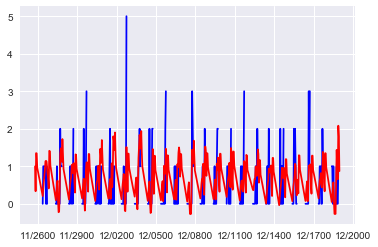

In [71]:
test_data.set_index('datetime',inplace=True)
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d%H'))
plt.plot(test_data["uri_su"],color='blue',label="sales")
plt.plot(lm_urisuu.predict(test_data),color='red',label="Predicted sales")